In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/kiryouri/videogames_sale_project/main/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [6]:
#в датасете присутствует как минимум одно значение за пределами 2016 года
df[df['Year_of_Release']>2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bad_ids=list(df[df['Year_of_Release']>2016].index)
df = df[~df.index.isin(bad_ids)] #If it's stupid but it works, it isn't stupid
df.Year_of_Release.max()

2016.0

In [8]:
df=df.dropna(subset=['Name', 'Genre', 'Year_of_Release', 'Publisher'])

In [9]:
df['Year_of_Release']= df.loc[:,'Year_of_Release'].astype('int')

In [10]:
df.Global_Sales

0        82.53
1        40.24
2        35.52
3        32.77
4        31.37
         ...  
16714     0.01
16715     0.01
16716     0.01
16717     0.01
16718     0.01
Name: Global_Sales, Length: 16412, dtype: float64

<AxesSubplot:title={'left':'Amount of games by platform'}, xlabel='Platform', ylabel='count'>

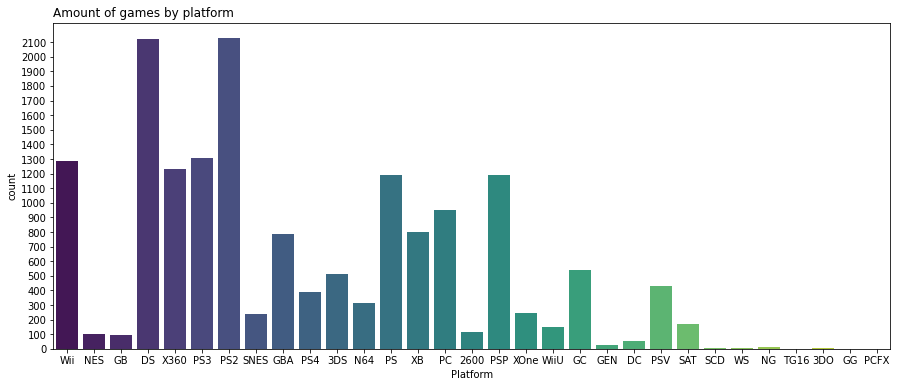

In [11]:
plt.figure(figsize=(15,6))
plt.title('Amount of games by platform', loc='left')
plt.yticks(np.arange(0, 2200, step=100))
sns.countplot(x=df["Platform"], palette='viridis') #сколько игр было выпущено на каждую платформу

In [12]:
sales_by_platform = df.groupby('Platform', as_index = False).agg({'Global_Sales':'sum'}) \
.sort_values(by='Global_Sales', ascending=False)

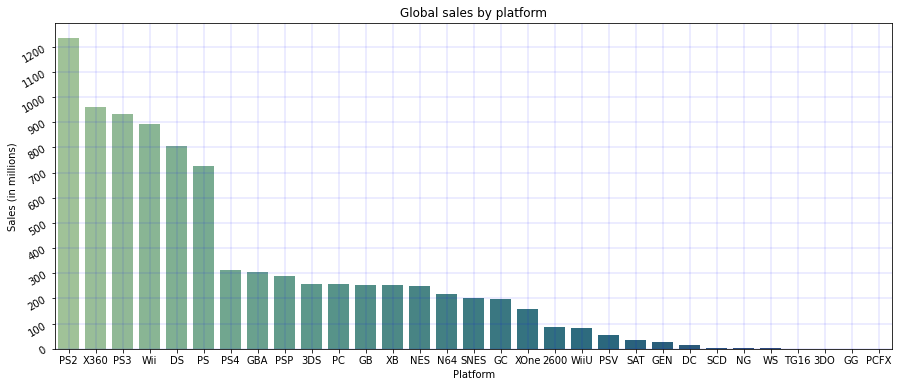

In [13]:
#Проданных копий на платформу
plt.figure(figsize=(15,6))
plt.title('Global sales by platform')
plt.yticks(np.arange(0, 1300, step=100), rotation=30)
sns.barplot(x='Platform',y='Global_Sales', data = sales_by_platform, palette='crest')
plt.ylabel('Sales (in millions)')
plt.grid(color='b', linestyle='-', linewidth=0.15)

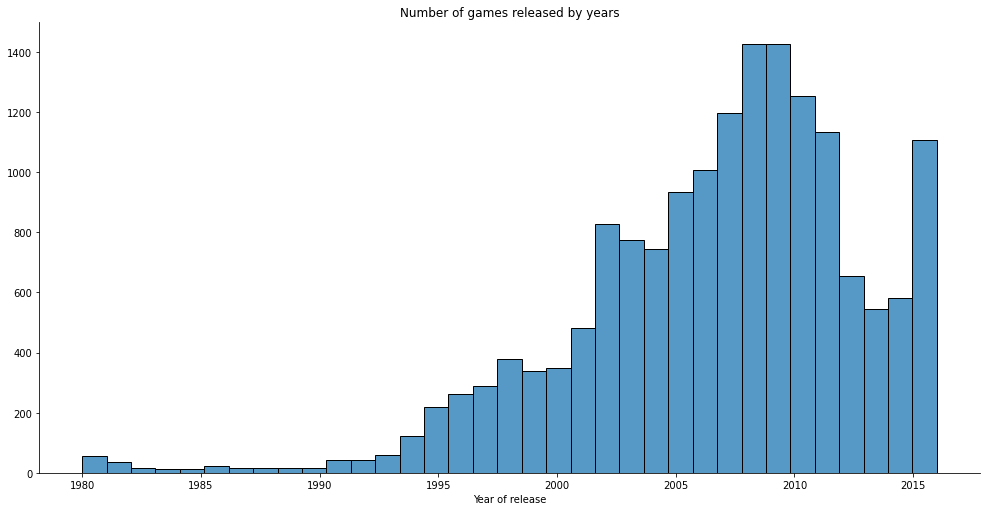

In [14]:
#Количество игр по годам релиза
sns.displot(df["Year_of_Release"], kde=False, bins = 35, height = 7, aspect = 2) #sns.displot() is a figure-level function. 
plt.title('Number of games released by years')
plt.xlabel('Year of release')
plt.ylabel('')
sns.despine()

Text(0, 0.5, 'Number of games')

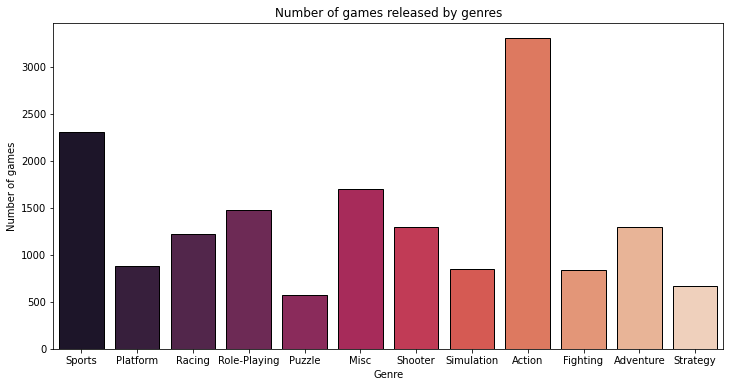

In [15]:
#Игры по жанрам
plt.figure(figsize=(12,6))
plt.title('Number of games released by genres')
sns.countplot(x=df['Genre'], edgecolor='black', palette='rocket')
plt.ylabel('Number of games')

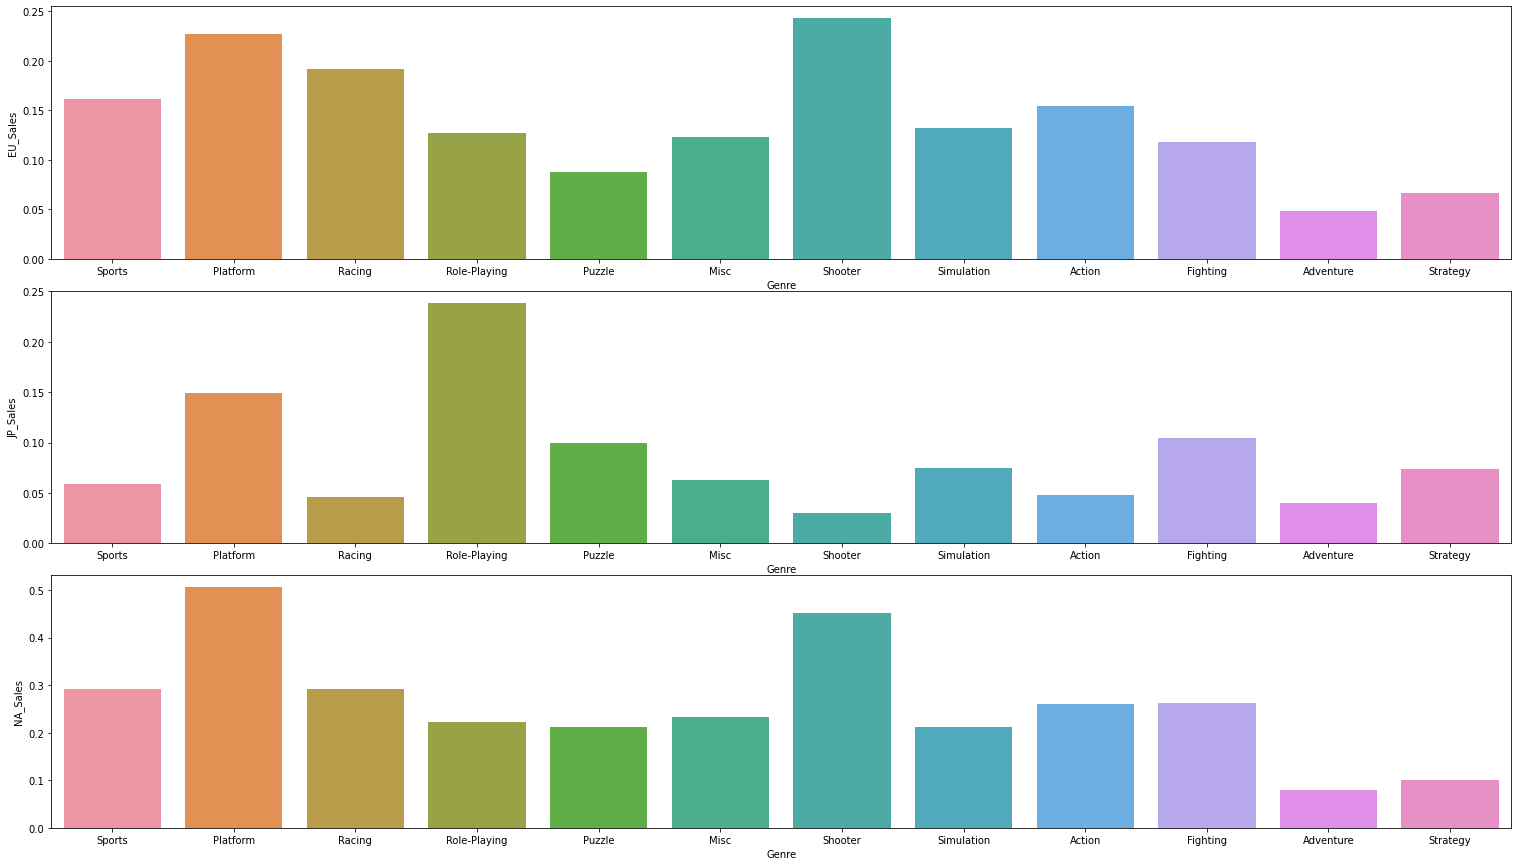

<Figure size 864x432 with 0 Axes>

In [16]:
fig, axes = plt.subplots(3, 1, figsize = [21,12])
axes=axes.flatten()
fig.tight_layout()
plt.figure(figsize = (12,6))
y_list=['EU_Sales','JP_Sales','NA_Sales']
for ax, y in zip(axes, y_list):
    sns.barplot(ax=ax, x='Genre', y = y, data = df, ci= None)

In [17]:
df.groupby('Genre').NA_Sales.mean()

Genre
Action          0.261092
Adventure       0.078536
Fighting        0.263453
Misc            0.232180
Platform        0.506196
Puzzle          0.212882
Racing          0.291314
Role-Playing    0.222849
Shooter         0.451258
Simulation      0.211241
Sports          0.291067
Strategy        0.100729
Name: NA_Sales, dtype: float64

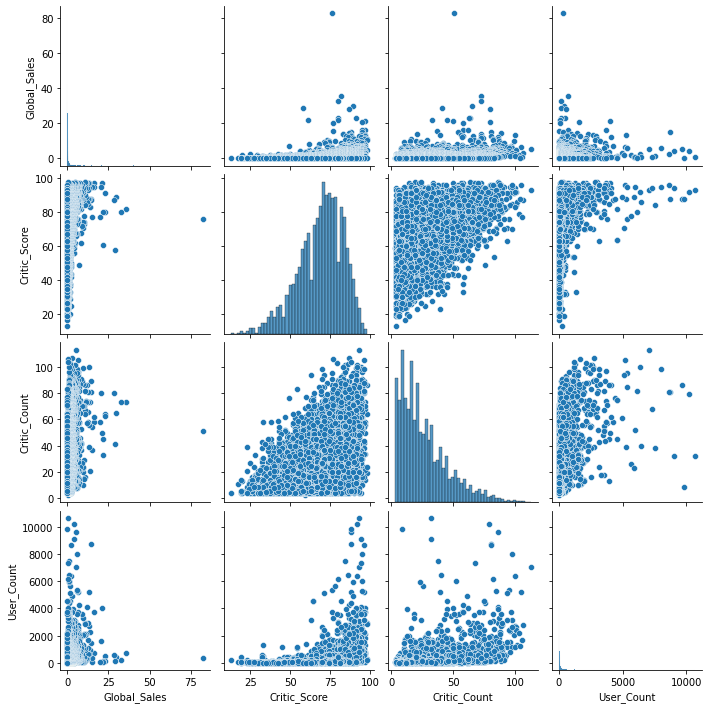

In [18]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']])

In [19]:
sale_score_cor = df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()

<AxesSubplot:>

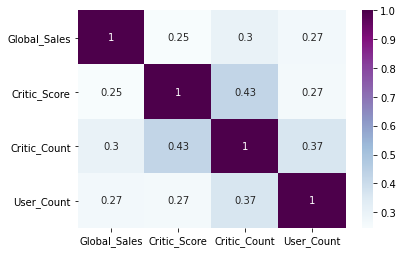

In [20]:
sns.heatmap(sale_score_cor, xticklabels = sale_score_cor.columns.values, yticklabels = sale_score_cor.columns.values, annot = True, cmap = "BuPu")

<AxesSubplot:xlabel='Year_of_Release', ylabel='Critic_Score'>

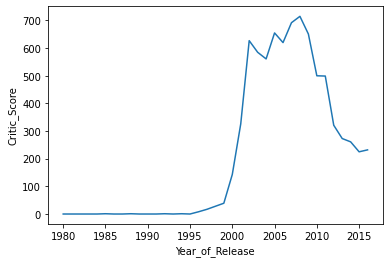

In [21]:
critic_score_by_years=df.groupby('Year_of_Release', as_index=False).agg({'Critic_Score':'count'})
sns.lineplot(x = 'Year_of_Release', y = 'Critic_Score', data = critic_score_by_years)